Import Necessary Labs

In [223]:
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style='white', palette='muted', color_codes=True)
import plotly.express as px
import io 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

Import The File

In [224]:
df = pd.read_csv(r'C:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-3-insurance.csv')

In [225]:
pip_df = df
logreg_df = df

In [226]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Find sum of zeroes per column

In [227]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

find any duplicates

In [228]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

IDENTIFY OUTLIERS

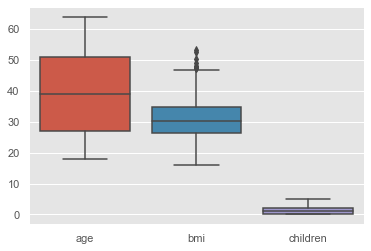

In [229]:
data_minus_insulin = df.columns[:-1]
sns.boxplot(data=df[data_minus_insulin]);

In [230]:
# sns.boxplot(df['sex'], color='lime')


<AxesSubplot:xlabel='bmi'>

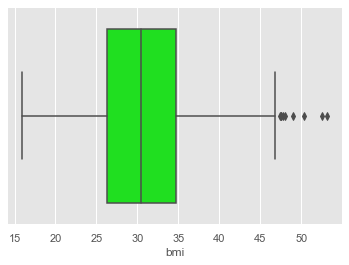

In [231]:
sns.boxplot(df['bmi'], color='lime')

PAIRPLOT

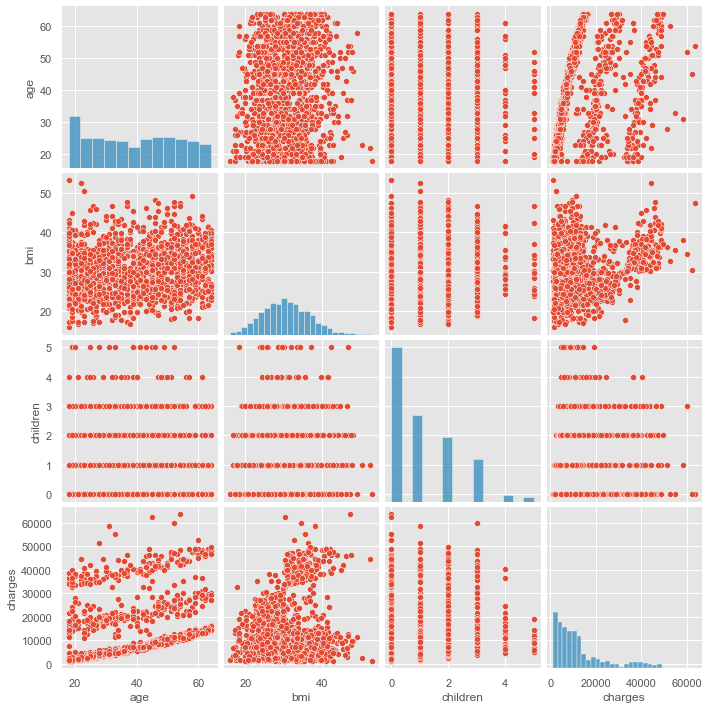

In [232]:
sns.pairplot(data=df, palette='dark')

JointPLOT

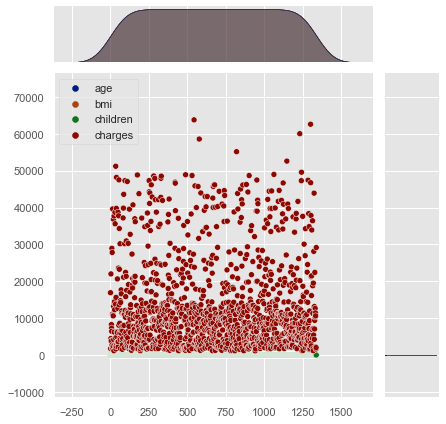

In [233]:
sns.jointplot(data=df, palette='dark')

HISTOGRAM

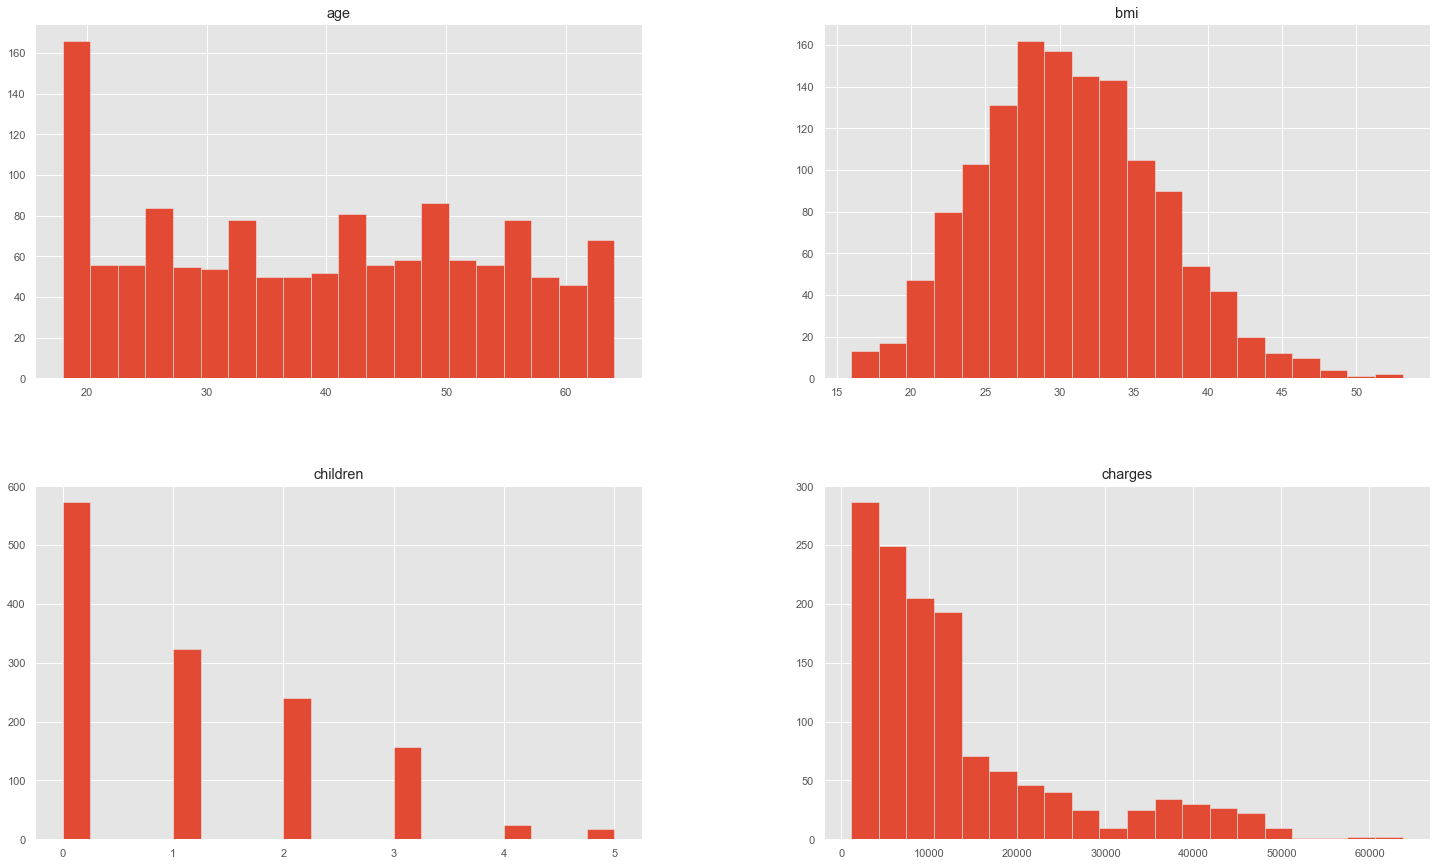

In [234]:
hist_dist = df.hist(bins=20,figsize=(25,15))

<AxesSubplot:xlabel='age', ylabel='Count'>

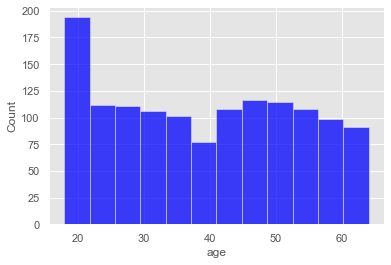

In [235]:
sns.histplot(df['age'], color='blue')

#                                                               MACHINE LEARNING ALGO

Import necessary labs

In [236]:
from sklearn.preprocessing import LabelEncoder  #Changes categorical text data to numerical
from sklearn.preprocessing import OneHotEncoder # Changes cat to numerical only that its better -- check notes for difference
from sklearn.preprocessing import OrdinalEncoder #
from sklearn.preprocessing import StandardScaler #
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split #
from sklearn.linear_model import LinearRegression #
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score #
from sklearn.metrics import mean_squared_error #
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.ensemble import RandomForestRegressor #
from sklearn.compose import ColumnTransformer
import warnings # suppresses pesky warnings??
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 


Encode Categorical Variables - categorical columns are -- sex, Smoker and region

In [237]:
#Label encoder are good for if you have two types of cat values --- either 'Yes' or 'No' aka for all data you get either '0' or '1'
le = LabelEncoder()
#Sex
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)
#Smoker
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)


Now look at the data below (the data has been transformed without creating new columns)

In [238]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Again, if there are numerous categories in a column, is best to use a OneHotEncoder

# Selecting Targets and Features for Prediction
-Target is what we want to Predict. In a regression problem, is a continuous numeric variable. In this example we will use  -- charges
-Features are variable used to predict the target ---age, sex, bmi, children, smoker and region

#                          STEPS OF PREDICTIONS (FEATURE ENGINEERING)
A feature engineering is a process of optimizing model features

1) Find which features have highest correlation with charges 


In [239]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

2) Use a Heatmap to further explore the correlation

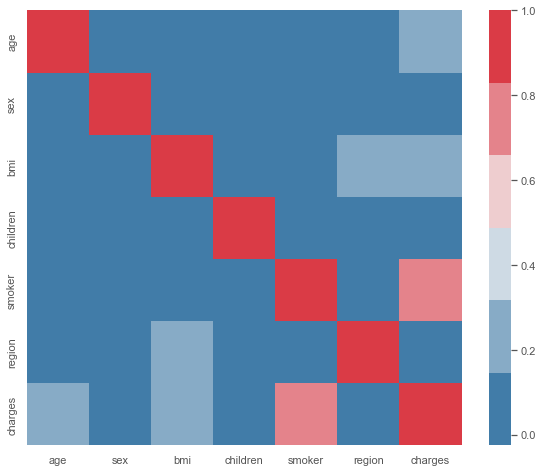

In [240]:
#Rem the dtype is because the LabelEncoder
f, ax = plt.subplots(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10), square=True, ax=ax);

2) Run a distribution Matrix correlating to the changes(determines how much is spend )

<AxesSubplot:xlabel='charges', ylabel='Count'>

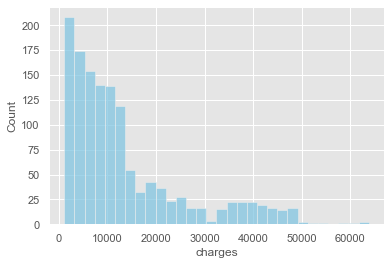

In [241]:
#   a) How many patients pay each amount of money
sns.histplot(df['charges'], color='c')

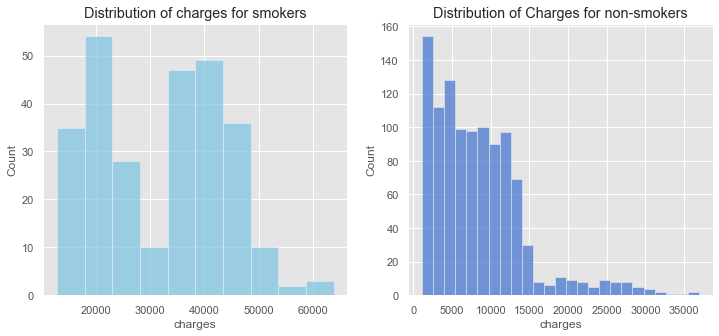

In [242]:
#   b) Break down on cost for smokers and non smokers
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)
sns.histplot(df[(df.smoker == 1)]['charges'],color='c', ax=ax)  #plots smokers charges
ax.set_title('Distribution of charges for smokers');

ax = f.add_subplot(122)
sns.histplot(df[(df.smoker == 0)]['charges'], color='b', ax=ax)
ax.set_title('Distribution of Charges for non-smokers');

#          Assign Targets and Features to regression Variables x and Y

In general the X-axis is the Feature while Y-axis is a Target

In [243]:
y_targ = df.charges
#I am going to drop what I don't need
x_feat = df.drop(['region', 'sex', 'children', 'charges'], axis='columns')


In [244]:
x_feat

,age,bmi,smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,0
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


# SCALE THE DATA

Scaling data is essentially standardizing --e.g. smoker is 0-1, bmi is 0-50 and age is 0-100

In [245]:
scaler = StandardScaler()
x = scaler.fit_transform(x_feat)
y= scaler.fit_transform(np.array(y_targ).reshape(-1,1))

Now look at the data scaled back

In [246]:
x

array([[-1.43876426, -0.45332   ,  1.97058663],
       [-1.50996545,  0.5096211 , -0.5074631 ],
       [-0.79795355,  0.38330685, -0.5074631 ],
       ...,
       [-1.50996545,  1.0148781 , -0.5074631 ],
       [-1.29636188, -0.79781341, -0.5074631 ],
       [ 1.55168573, -0.26138796,  1.97058663]])

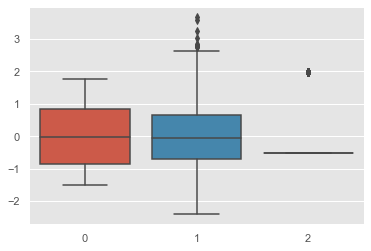

In [247]:
sns.boxplot(data=x);

# SPLIT NOW THE DATA

Data is split to create training and testing datasets 
Training data sets are like practice tests before real exam While Test data measures how well the model performs on data it hasn't encountered in the training

# SPLIT THE DATA

In [248]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

# CREATING A MODEL

# Creating a Model. A trained algorithm using scikit-learn can be defined as a mode

1) Linear Regression Model

In [249]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)  #This is where the training occurs

LinearRegression()

# TEST THE MODEL

Testing the model against the test data. Each row is calculated a prediction variable y_pred based on the linear regression model x_test

In [250]:
y_pred = linreg.predict(x_test)

In [251]:
# EVALUATE MODEL PERFORMANCE

To check how model performed against test data we use R-square which has values between 0-1 and tells how regression line predicted actual test values

In [252]:
#Evaluates prediction of test data
{r2_score(y_true=y_test, y_pred=y_pred):.3}

{0.7872914737498631: 0.3}

In [253]:
print(f'The R-squared score is {r2_score(y_true=y_test, y_pred=y_pred):.3} using a 3-Feature model')

The R-squared score is 0.787 using a 3-Feature model


R-squared close to 1 is good but relies heavily on the data preparation process

# REPEAT THE PROCESS USING A 6 FEATURE VERSION

Lets say nothing was dropped except the y value

In [254]:
ny_targ = df.charges
nx_feat = df.drop(['charges'], axis=1)

In [255]:
#Normalize the data
scaler = StandardScaler()
x = scaler.fit_transform(nx_feat)
y = scaler.fit_transform(np.array(ny_targ).reshape(-1,1))

In [256]:
#Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=0)

In [257]:
#Create a Linear regression object & train the model
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [258]:
# Predict on the test data
y_pred = linreg.predict(x_test)


In [259]:
{r2_score(y_true=y_test, y_pred=y_pred):.3}

{0.7911113876316934: 0.3}

In [260]:
print(f'The 6-Feature R-squared is {r2_score(y_true=y_test, y_pred=y_pred):.3}')

The 6-Feature R-squared is 0.791


In [261]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse', # mse: mean squared error
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train) # The actual training
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R-squared train data: %.3f, R-squared test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 0.024, MSE test data: 0.156
R-squared train data: 0.975, R-squared test data: 0.857


# NEXT IS LAB 4 & LAB 6 & LAB 2 CLEANING PARTS

How can you use the r2 prediction scores to determine the cost of care, for the random forest is 0.85 good enough or not

# BUILD PIPELINE

Once you are aware of categorical and continuos variables in a dataset, you can skip the whole standardize and transformation of each by using a pipeline
One stone to kill several birds and then assigned the X and Y

In [262]:
#pip_df, is copy of original data
pip_df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523


In [263]:
full_pipeline = ColumnTransformer([ 
    ('num', StandardScaler(), ['age', 'bmi', 'children']),
    ('cat', OrdinalEncoder(), ['sex', 'smoker', 'region'])
])

Now Assign X and Y

In [264]:
pip_y = pip_df['charges']
features = pip_df.drop(['charges'], axis=1)
pip_x = pd.DataFrame(full_pipeline.fit_transform(features))


Now Look again at this data

In [265]:
pip_x

,0,1,2,3,4,5
0,-1.438764,-0.453320,-0.908614,0.0,1.0,3.0
1,-1.509965,0.509621,-0.078767,1.0,0.0,2.0
2,-0.797954,0.383307,1.580926,1.0,0.0,2.0
3,-0.441948,-1.305531,-0.908614,1.0,0.0,1.0
4,-0.513149,-0.292556,-0.908614,1.0,0.0,1.0
...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,1.0,0.0,1.0
1334,-1.509965,0.206139,-0.908614,0.0,0.0,0.0
1335,-1.509965,1.014878,-0.908614,0.0,0.0,2.0
1336,-1.296362,-0.797813,-0.908614,0.0,0.0,3.0


FROM HERE YOU JUST SPLIT THE DATA

In [266]:
Test_size = 0.3
Random_STATE = 42
X_train, x_test, y_train, y_test = train_test_split(pip_x, pip_y, test_size=Test_size ,random_state=Random_STATE )

NEXT BUILD MODELS, STARTING WITH SIMPLEST MODEL TO COMPLEX

In [267]:
# log_reg = LogisticRegression()
# log_reg.fit(X_train, y_train)

In [268]:
#Logistic Regression
# log_reg = LogisticRegression()
# log_reg.fit(X_train, y_train)
# y_pred = log_reg.predict(X_test)
# print(f' Accuracy on test set: {accuracy_score(y_test, y_pred):.3f}')

# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=0)
# logreg = LogisticRegression()
# logreg.fit(X_train,y_train)
# y_pred = logreg.predict(X_test)

CONFUSION MATRIX

In [269]:
#A confusion matrix is a visualization of True Positives and Negatives, and False Positives and Negative
# pip_df_ = {'y_true':y_test,
#         'y_pred': y_pred
#         }

# pip_df = pd.DataFrame(pip_df_, columns=['y_true','y_pred'])
# confusion_matrix = pd.crosstab(pip_df['y_true'], pip_df['y_pred'], rownames=['TRUE'], colnames=['PREDICTED'])

# sns.heatmap(confusion_matrix, annot=True)
# plt.show()

DATA MODELLING NEW WAY FORWARD

1) Splitting data is essentially dividing it into training and testing and can use a 80:20 or 70:30 ratio

In [ ]:
full_pipeline = ColumnTransformer([ 
    ('num', StandardScaler(), ['age', 'bmi', 'children']),
    ('cat', OrdinalEncoder(), ['sex', 'smoker', 'region'])
])

In [270]:
logreg_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [280]:
y_data = logreg_df['charges']
# x_data = logreg_df.drop('charges', axis=1)

x_data = logreg_df.drop(['charges'], axis=1)
pip_x = pd.DataFrame(full_pipeline.fit_transform(x_data))

In [281]:
full_pipeline = ColumnTransformer([ 
    ('num', StandardScaler(), ['age', 'bmi', 'children']),
    ('cat', OrdinalEncoder(), ['sex', 'smoker', 'region'])
])

In [282]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, test_size = 0.2, random_state=0)

ValueError: not enough values to unpack (expected 4, got 2)